# ADVANCED LINEAR ALGEBRA

This notebook does visual explorations of linear transformations and factorings.

In [5]:
try:
    import controlSBML as ctl
except:
    !pip install controlSBML
    import controlSBML as ctl

import itertools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tellurium as te

# Helpers

In [ ]:
def simulateAndPlot(roadrunner, start_time=0, end_time=5, num_point=50, variables=None, is_species=True, is_plot=True):
    """
    Runs a simulation and plots the variables.
    
    Parameters
    ----------
    roadrunner: ExtendedRoadrunner
    variables: list-str
    
    Returns
    -------
    Timeseries
    """
    if variables is None:
        if is_species:
            variables = ["time", "S1", "S2", "S3"]
        else:
            variables = ["time", "J0", "J1", "J2"]
    roadrunner.reset()
    ts = ctl.Timeseries(roadrunner.simulate(start_time, end_time, num_point, variables))
    if is_plot:
        ctl.plotOneTS(ts, figsize=(6, 4))
    return ts
    
# Tests
model = "S1->; S2*S3; S1=0; S2=0; S3=0"
rr = te.loada(model)
simulateAndPlot(rr, is_plot=False)
print("OK!")

OK!


In [ ]:
def formatMat(mat, column_names=None, row_names=None):
    """
    Provides a nice format for a matrix.

    Parameters
    ----------
    mat: np.Array, NamedArray
    column_names: list-str
    row_names: list-str
    """
    if len(np.shape(mat)) == 1:
        mat = np.reshape(mat, (len(mat), 1))
    if column_names is None:
        if ("NamedArray" in str(type(mat))):
            column_names = mat.colnames
        else:
            column_names = range(np.shape(mat)[1])
    if row_names is None:
        if ("NamedArray" in str(type(mat))):
            row_names = mat.rownames
        else:
            row_names = range(np.shape(mat)[0])
    return pd.DataFrame(mat, columns=column_names, index=row_names)

# Tests
mat = np.array(range(10))
result1 = formatMat(mat, column_names=["a"])
mat = np.reshape(mat, (5,2))
result2 = formatMat(mat, column_names=["a", "b"])
#result1, result2
print("OK!")

OK!


# Visualizing Matrix Multiplication

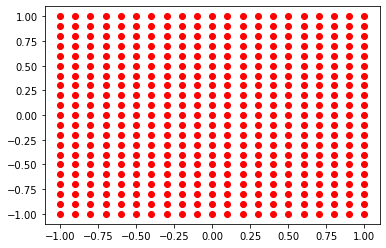

In [13]:
# Make a square of dots
size = 20
x_vals = np.linspace(-1, 1, size+1)
y_vals = np.linspace(-1, 1, size+1)
pairs = list(itertools.product(x_vals, y_vals))
xv = []; yv = []
[xv.append(p[0]) for p in pairs]
[yv.append(p[1]) for p in pairs]
plt.scatter(xv, yv, color="red")

In [31]:
def makeRectangle(density=20, xstretch=1, ystretch=1):
    """
    Makes a square with unit length sides.

    Parameters
    ----------
    density: int
        dot per unit

    Returns
    -------
    list-(float, float)
    """
    size = 20
    x_vals = np.linspace(-0.5*xstretch, 0.5*xstretch, density+1)
    y_vals = np.linspace(-0.5*ystretch, 0.5*ystretch, density+1)
    return list(itertools.product(x_vals, y_vals))

# Tests
pairs = makeRectangle()
assert(len(pairs) > 0)
assert(len(pairs[0]) == 2)
assert(isinstance(pairs[0][0], float))
print("OK!")

OK!


OK!


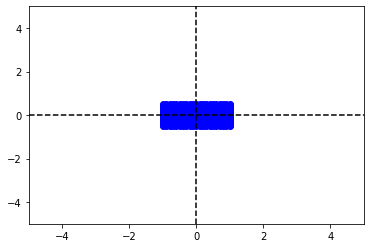

In [64]:
def plotPairs(pairs, ax=None, color="blue", scale=5, is_plot=True):
    if ax is None:
        _, ax = plt.subplots(1)
    xv = []; yv = []
    [xv.append(p[0]) for p in pairs]
    [yv.append(p[1]) for p in pairs]
    ax.scatter(xv, yv, color=color)
    ax.plot([0, 0], [-scale, scale], linestyle="dashed", color="black")
    ax.plot([-scale, scale], [0, 0], linestyle="dashed", color="black")
    ax.set_xlim([-scale, scale])
    ax.set_ylim([-scale, scale])
    if not is_plot:
        plt.close()
    
# Tests
plotPairs(makeRectangle(xstretch=2), is_plot=True)
print("OK!")

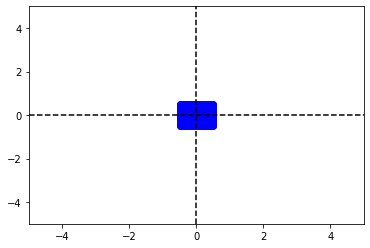

In [40]:

plotPairs(pairs)

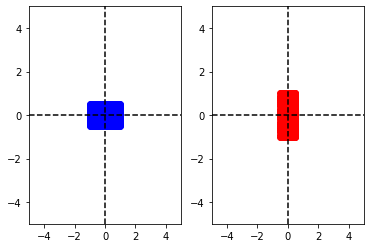

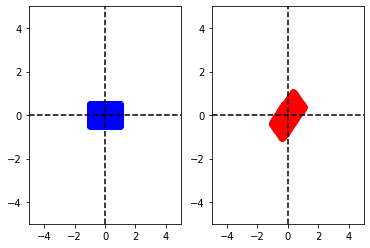

In [55]:
def plotTransform2d(mat):
    """
    Plots the effect of a 2-d transformation
    """
    pairs = makeRectangle(xstretch=2)
    transform_mat = np.array(pairs)
    new_pair_arr = [np.matmul(mat, np.array(p)) for p in pairs]
    _, axes = plt.subplots(1, 2)
    plotPairs(pairs, ax=axes[0], color="blue")
    plotPairs(new_pair_arr, ax=axes[1], color="red")

# Test
mat = np.array([ [0, 1], [1, 0]])
plotTransform2d(mat)
# Rotate theta degrees
theta = np.pi/4
mat = np.transpose(np.array([ [np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]]))
plotTransform2d(mat)

In [57]:
U,S,V = np.linalg.svd(mat)

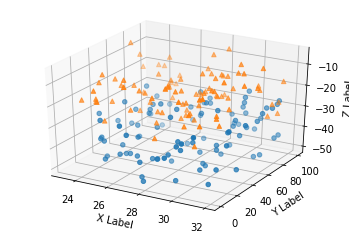

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

plot in 3d